In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [2]:
from google.colab import drive
drive.mount('/gdrive')
demo = pd.read_csv("/gdrive/My Drive/General Machine Learning Training/Cancer Detection Case Study/wisc_bc_data.csv")
demo = demo.drop('id',axis=1)
demo.head()

Mounted at /gdrive


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(demo)
sweet_report.show_html('sweet_report.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.4 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
from sklearn.linear_model import LogisticRegression
y=demo['diagnosis']
X = demo.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = LogisticRegression()
dt.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))

predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.9385964912280702
What is the Training Accuracy
0.945054945054945
[[74  3]
 [ 4 33]]
              precision    recall  f1-score   support

           B       0.95      0.96      0.95        77
           M       0.92      0.89      0.90        37

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')
dt.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(dt.feature_importances_)

What is the Testing Accuracy
0.8947368421052632
What is the Training Accuracy
0.9296703296703297
[[68  9]
 [ 3 34]]
              precision    recall  f1-score   support

           B       0.96      0.88      0.92        77
           M       0.79      0.92      0.85        37

    accuracy                           0.89       114
   macro avg       0.87      0.90      0.88       114
weighted avg       0.90      0.89      0.90       114

[0.         0.         0.         0.         0.         0.
 0.         0.74291705 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10889944 0.         0.14818351 0.
 0.         0.         0.         0.         0.         0.        ]


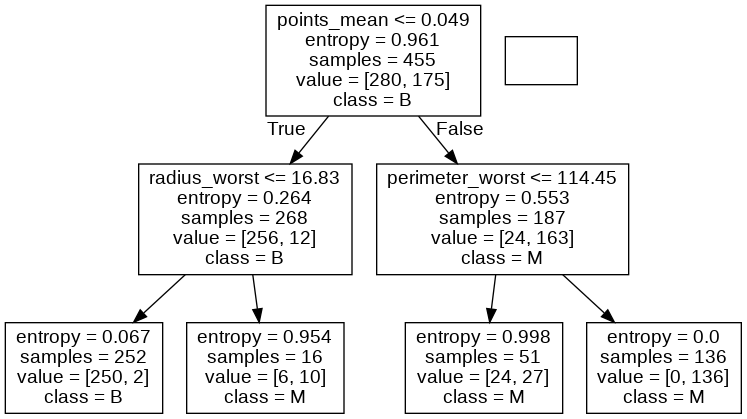

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image  
labels = X_train.columns
dot_data = tree.export_graphviz(dt, feature_names = labels, class_names = ["B","M"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decis|ion tree
Image(graph.create_png())